# Freshman Final Onboarding: Movie Rating Prediction


Import Packages


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import svm
# from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import sys
import time
from sklearn import svm
import statistics
plt.style.use('ggplot')

Import Datasets

In [ ]:
scores = pd.read_csv('genome-scores.csv')
tags = pd.read_csv('genome-tags.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

Create list of the tag IDs for positive and negative genome tags

In [ ]:
positive_list = [95,96,155,332,1057]
negative_list = [445,464,497,505,1059]

**SVM classification**: calculate average positive and negative scores for movies based on genome tag relevance

In [ ]:
#calculate average 
#for loop over movies numbers
arr = np.empty(shape=[0, 2])
arr_y = np.empty(shape=[0, 1])
arr_both = np.empty(shape=[0, 3])

#for movie in range(len(movies['movieId'])): 
for movie in range(1,80):
  ratingVal=0
  aboveAvg=True
  df1=ratings.loc[(ratings['movieId']==movie)].values[1]
  ratingVal=df1[2]

  if ratingVal>3.5:
    aboveAvg=False
  
  total=0 
  try:
    for x in positive_list:
      df11=scores.loc[(scores['movieId']==movie) & (scores['tagId']==x) ]
      total=total+df11['relevance'].values[0]
    positiveAverage=total/5


    totalMinus=0
    for x in negative_list:
      df11=scores.loc[(scores['movieId']==movie) & (scores['tagId']==x) ]
      totalMinus=totalMinus+df11['relevance'].values[0]
    negativeAverage=totalMinus/5
    
  
  except:
    continue
  arr = np.append(arr,[[positiveAverage,negativeAverage]], axis=0)
  arr_y = np.append(arr_y,[[aboveAvg]], axis=0)
  arr_both = np.append(arr_both,[[positiveAverage,negativeAverage,aboveAvg]], axis=0)


Train/Validate/Test Split 

In [ ]:
#split into testing and training data
X_train, X_test,y_train, y_test = train_test_split(arr,arr_y,random_state=104, 
test_size=0.25)

Model Training

In [ ]:
#algorithm

clf = svm.SVC(kernel='linear')

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predict Accuracy

In [ ]:
#accuracy
accuracy_score(y_test, y_pred)

0.75

Visualize Results

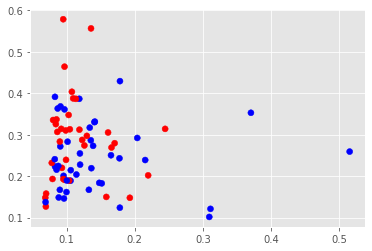

In [ ]:
#visualization 
#wrong because np where is manual based on greater or less then when it should be based on algorithm

plt.scatter(arr[:, 0],arr[:,1], color = np.where(arr_both[:,2], "blue","red"))

plt.show()

Neural Network

In [ ]:
arr2 = np.empty(shape=[0, 1])

for movie in range(len(movies['movieId'])): 
  totalrate=0
  raters=0
  try:
    for x in len(ratings['userId']):
      df11=ratings.loc[(ratings['movieId']==movie)
      totalrate=totalrate+df11['rating'].values[0]
      raters=raters + 1
    scoreavg=totalrate/raters      
  except:
    continue
  # can we use the value of pos/neg from before and then add the scoreaverage and then build NN by cosine similarity or something?
  arr2 = np.append(arr,[[positiveAverage,negativeAverage, posorneg]], axis=0)
print(arr)

SyntaxError: ignored